In [2]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, read_csv_from_web
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `ttH > ee` CP-even [1911.04968](https://arxiv.org/abs/1911.04968)
We ignore potential `tH` and `tWH` contributions for a conservative limit. 

This limit has an intermediate region where there is no sensitivity, that's why we add the datapoints with huge limit values.

Replaced by updated CMS search: [2402.11098](https://arxiv.org/abs/2402.11098) (see below)

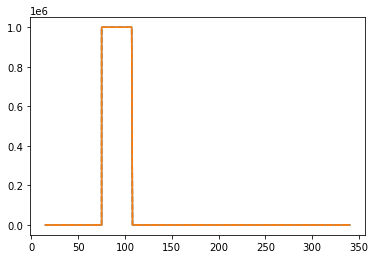

Looks good. Saving this to Htt_LHC13_CMS_137.json


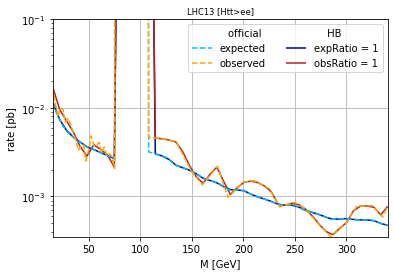

In [2]:
# dfExp = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012a/1/csv",
#     comment="#",
#     skiprows=55,
#     skipfooter=149 - 101,
#     engine="python",
#     names=["m", "exp", "unc+", "unc-", "unc++", "unc--"],
# )

# df = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012a/1/csv",
#     comment="#",
#     skiprows=8,
#     skipfooter=149 - 54,
#     engine="python",
#     names=["m", "obs"],
# )
# assert np.allclose(df.m, dfExp.m)
# df["exp"] = dfExp.exp
# df = (
#     df.append(
#         pd.DataFrame(data={"m": [75.01, 107.09], "obs": 1e6, "exp": 1e6}),
#         ignore_index=True,
#     )
#     .sort_values("m")
#     .reset_index(drop=True)
# )

# process = {"channels": [["Htt", "ee"]]}
# limitFile = implementChannelLimit(
#     "1911.04968",
#     process,
#     "https://doi.org/10.17182/hepdata.91969.v1/t49",
#     df,
#     idSuffix=3,  # 1 and 2 are the mumu limits
#     massResolution=resolution.mumu["light"],
# )
# lim = HB.Limit(limitFile)
# fig, ax = validateChannelLimit(lim)
# ax.set_ylim(top=1e-1);


## `ttH > ee` CP-odd [1911.04968](https://arxiv.org/abs/1911.04968)
Same coments as the CP-even version

Replaced by updated CMS search: [2402.11098](https://arxiv.org/abs/2402.11098) (see below)

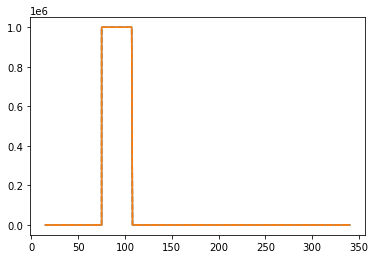

Looks good. Saving this to Att_LHC13_CMS_137.json


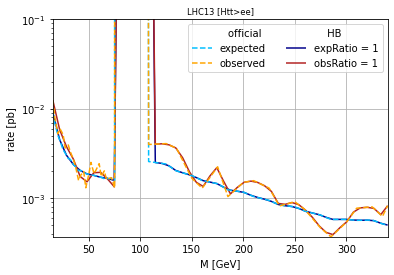

In [3]:
# dfExp = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012b/1/csv",
#     comment="#",
#     skiprows=55,
#     skipfooter=149 - 101,
#     engine="python",
#     names=["m", "exp", "unc+", "unc-", "unc++", "unc--"],
# )

# df = read_csv_from_web(
#     "https://www.hepdata.net/download/table/ins1764474/Figure%2012b/1/csv",
#     comment="#",
#     skiprows=8,
#     skipfooter=149 - 54,
#     engine="python",
#     names=["m", "obs"],
# )
# assert np.allclose(df.m, dfExp.m)
# df["exp"] = dfExp.exp
# df = (
#     df.append(
#         pd.DataFrame(data={"m": [75.01, 107.09], "obs": 1e6, "exp": 1e6}),
#         ignore_index=True,
#     )
#     .sort_values("m")
#     .reset_index(drop=True)
# )

# process = {"channels": [["Htt", "ee"]]}
# limitFile = implementChannelLimit(
#     "1911.04968",
#     process,
#     "https://doi.org/10.17182/hepdata.91969.v1/t50",
#     df,
#     idSuffix=4, # 1 and 2 are the mumu limits
#     prefix="Att",
#     massResolution=resolution.mumu["light"],
# )
# lim = HB.Limit(limitFile)
# fig, ax = validateChannelLimit(lim)
# ax.set_ylim(top=1e-1);


## `ttH > ee` CP-even [2402.11098](https://arxiv.org/abs/2402.11098)
We ignore potential `tH` and `tWH` contributions for a conservative limit. 

--2024-03-15 16:25:09--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Scalar%20/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 188.185.7.34, 188.185.115.70, 188.185.25.68, ...
Connecting to www.hepdata.net (www.hepdata.net)|188.185.7.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17556 (17K) [text/csv]
Saving to: ‘csv’

     0K .......... .......                                    100% 1.60M=0.01s

2024-03-15 16:25:19 (1.60 MB/s) - ‘csv’ saved [17556/17556]



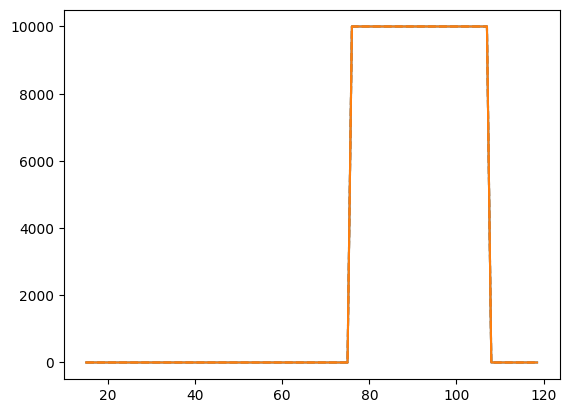

Looks good. Saving this to ttHlowMass_LHC13_CMS_138.json


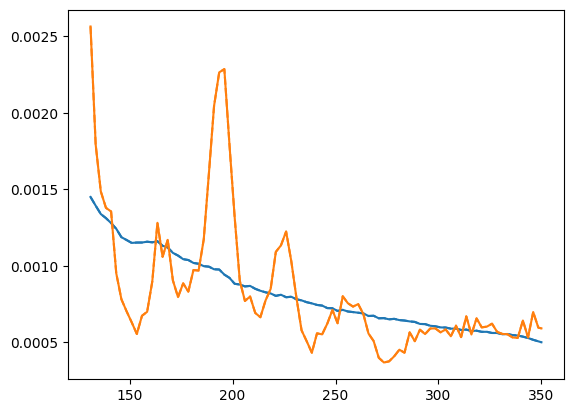

Looks good. Saving this to ttHhighMass_LHC13_CMS_138.json


In [2]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Scalar%20/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t58",
    dflow,
    idSuffix=9,
    prefix="ttHlowMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "even"},
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t58",
    dfhigh,
    idSuffix=10,
    prefix="ttHhighMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "even"},
)

## `ttH > ee` CP-odd [2402.11098](https://arxiv.org/abs/2402.11098)
We ignore potential `tH` and `tWH` contributions for a conservative limit.

--2024-03-15 16:34:53--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Pseudoscalar%20/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 137.138.52.170, 188.185.72.42, 137.138.123.58, ...
Connecting to www.hepdata.net (www.hepdata.net)|137.138.52.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17901 (17K) [text/csv]
Saving to: ‘csv’

     0K .......... .......                                    100% 1.92M=0.009s

2024-03-15 16:35:24 (1.92 MB/s) - ‘csv’ saved [17901/17901]



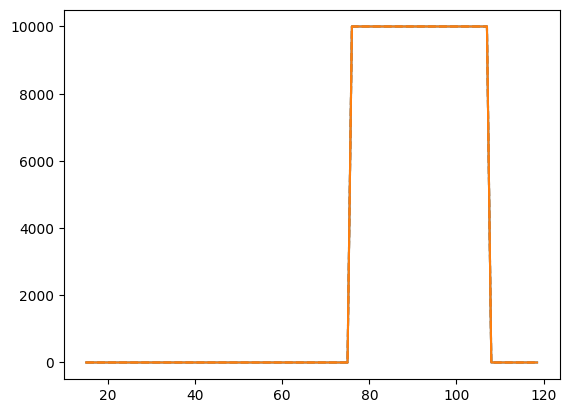

Looks good. Saving this to ttAlowMass_LHC13_CMS_138.json


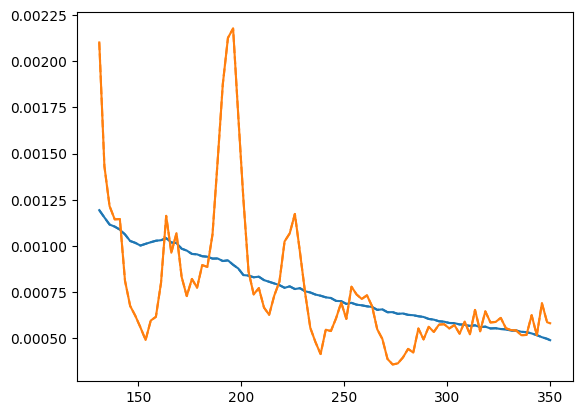

Looks good. Saving this to ttAhighMass_LHC13_CMS_138.json


In [3]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24t%5Cbar%7Bt%7D%20%5Cphi%24%20Pseudoscalar%20/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t59",
    dflow,
    idSuffix=11,
    prefix="ttAlowMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "odd"},
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["Htt", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t59",
    dfhigh,
    idSuffix=12,
    prefix="ttAhighMass",
    massResolution=resolution.mumu["light"],
    constraints={"CPValue": "odd"},
)


## `ZH > ee` [2402.11098](https://arxiv.org/abs/2402.11098)

Implemented is what they call the "Higgs-like" case

--2024-03-15 18:33:57--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24Z%5Cphi%24%20H-like%20/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 188.185.25.68, 188.185.115.70, 137.138.52.170, ...
Connecting to www.hepdata.net (www.hepdata.net)|188.185.25.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16668 (16K) [text/csv]
Saving to: ‘csv’

     0K .......... ......                                     100% 1.54M=0.01s

2024-03-15 18:34:07 (1.54 MB/s) - ‘csv’ saved [16668/16668]



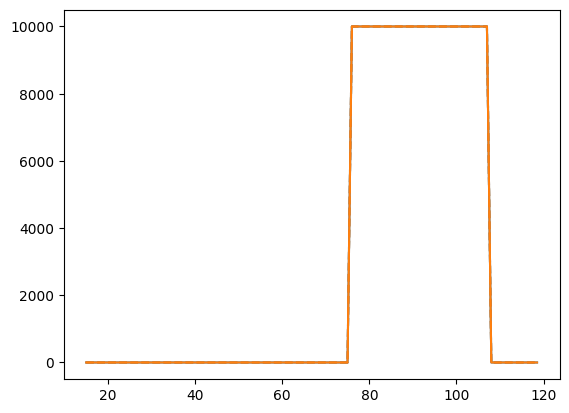

Looks good. Saving this to ZHlowMass_LHC13_CMS_138.json


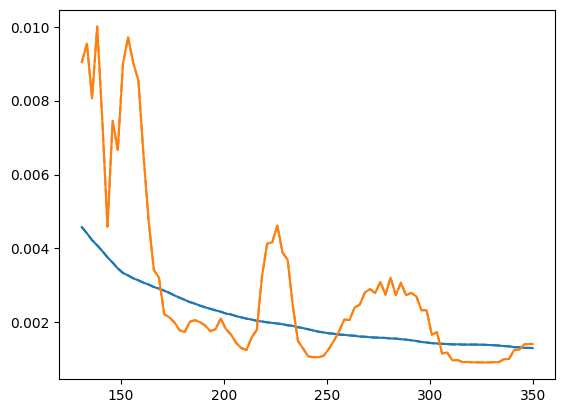

Looks good. Saving this to ZHhighMass_LHC13_CMS_138.json


In [3]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24Z%5Cphi%24%20H-like%20/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HZ", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t53",
    dflow,
    idSuffix=21,
    prefix="ZHlowMass",
    massResolution=resolution.mumu["light"]
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HZ", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t53",
    dfhigh,
    idSuffix=22,
    prefix="ZHhighMass",
    massResolution=resolution.mumu["light"]
)


## `WH > ee` [2402.11098](https://arxiv.org/abs/2402.11098)

Implemented is what they call the "Higgs-like" case

--2024-03-15 18:40:36--  https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24W%5Cphi%24%20H-like%20/2/csv
Resolving www.hepdata.net (www.hepdata.net)... 188.185.25.68, 188.185.115.70, 188.185.7.34, ...
Connecting to www.hepdata.net (www.hepdata.net)|188.185.25.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16836 (16K) [text/csv]
Saving to: ‘csv’

     0K .......... ......                                     100% 1.44M=0.01s

2024-03-15 18:41:01 (1.44 MB/s) - ‘csv’ saved [16836/16836]



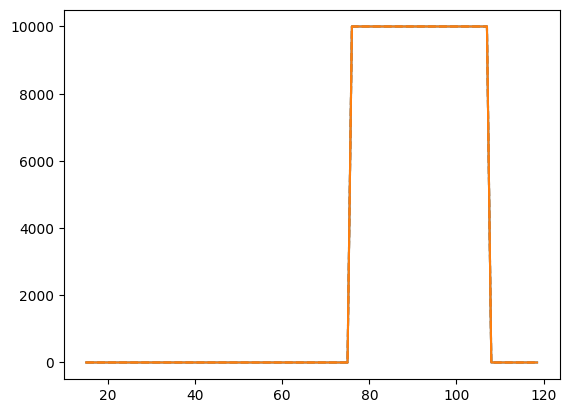

Looks good. Saving this to WHlowMass_LHC13_CMS_138.json


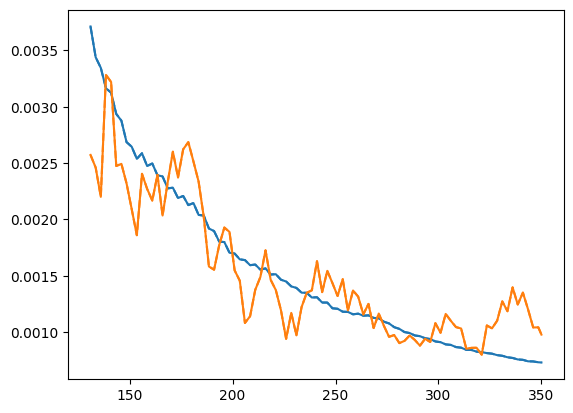

Looks good. Saving this to WHhighMass_LHC13_CMS_138.json


In [4]:
os.system("wget 'https://www.hepdata.net/download/table/ins2759506/Limit%20on%20%24%5Csigma%20B%24(ee)%2C%20%24W%5Cphi%24%20H-like%20/2/csv'")
os.system("head -n 231 csv > topcsv")
os.system("tail -n 225 csv > bottomcsv")

df1 = pd.read_csv(
    "topcsv",
    comment="#")
df2 = pd.read_csv(
    "bottomcsv",
    comment="#")

os.system("rm csv")
os.system("rm topcsv")
os.system("rm bottomcsv")

df = pd.DataFrame()
df["m"] = df1["$m_{\phi}$ [GeV]"]
df["obs"] = df1["Observed 95% CL upper limit on $\sigma B$ [pb]"]
df["exp"] = df2["Median expected 95% CL upper limit on $\sigma B$ [pb]"]

dflow = df[df["m"] < 120.0]
# Add grey block without limit to dflow
dflowgrey = pd.DataFrame(
    [
        {"m": 76.0, "obs": 10000, "exp": 10000},
        {"m": 107.0, "obs": 10000, "exp": 10000}
    ]
)
dflow = pd.concat([dflow, dflowgrey])
dflow.sort_values(by=["m"], inplace=True)
dflow.reset_index(inplace=True)

dfhigh = df[df["m"] > 130.0]
dfhigh.reset_index(inplace=True)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HW", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t52",
    dflow,
    idSuffix=23,
    prefix="WHlowMass",
    massResolution=resolution.mumu["light"]
)

limitfile = implementChannelLimit(
    "2759506",
    {"channels": [["HW", "ee"]]},
    "https://doi.org/10.17182/hepdata.132367.v2/t52",
    dfhigh,
    idSuffix=24,
    prefix="WHhighMass",
    massResolution=resolution.mumu["light"]
)


# CMS 8TeV LHC

## `hSM > ee` 8TeV combination [1410.6679](https://arxiv.org/abs/1410.6679)

Multiple different luminosity values: [19.7, 5.0] using 19.7 unless you set it manually


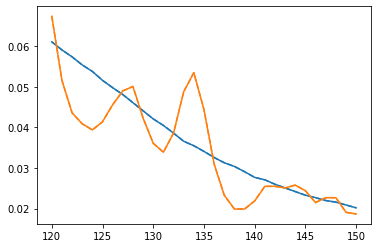

Looks good. Saving this to comb_LHC8_CMS_20.json


/home/jonasw/Projects/HB++/.venv/lib/python3.9/site-packages/Higgs/tools/LimitValidation.py:138: RuntimeWarning: divide by zero encountered in testAgainstChannelLimit (vectorized)
  expR, obsR = test(XX, YY)
/home/jonasw/Projects/HB++/.venv/lib/python3.9/site-packages/Higgs/tools/LimitValidation.py:138: RuntimeWarning: invalid value encountered in testAgainstChannelLimit (vectorized)
  expR, obsR = test(XX, YY)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'LHC8 [vbfH,HW,H,HZ]>[ee]'}, xlabel='M [GeV]', ylabel='rate [pb]'>)

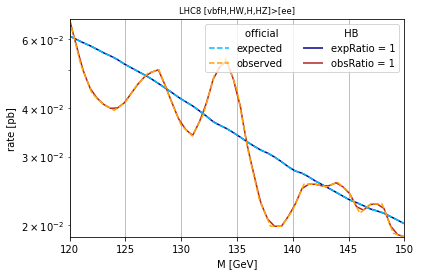

In [9]:
df = pd.DataFrame(
    data={
        "m": np.arange(120, 150.1, 1),
        "obs": [
            0.0674,
            0.0516,
            0.0436,
            0.0409,
            0.0394,
            0.0414,
            0.0456,
            0.049,
            0.0501,
            0.0423,
            0.0361,
            0.0339,
            0.0386,
            0.0488,
            0.0535,
            0.0444,
            0.031,
            0.0233,
            0.0199,
            0.0199,
            0.0219,
            0.0255,
            0.0255,
            0.0251,
            0.0258,
            0.0244,
            0.0215,
            0.0227,
            0.0227,
            0.0191,
            0.0187,
        ],
        "exp": [
            0.0611,
            0.0591,
            0.0574,
            0.0554,
            0.0538,
            0.0516,
            0.0498,
            0.0481,
            0.0461,
            0.0441,
            0.0421,
            0.0405,
            0.0386,
            0.0366,
            0.0355,
            0.0341,
            0.0326,
            0.0313,
            0.0304,
            0.0291,
            0.0277,
            0.0271,
            0.026,
            0.0251,
            0.0242,
            0.0233,
            0.0227,
            0.022,
            0.0216,
            0.0209,
            0.0202,
        ],
    }
)

process = {"channels": [["ggH", "ee"]]}
limitFile = implementChannelLimit(
    "1410.6679",
    {"channels": [[p, "ee"] for p in ["H", "vbfH", "HZ", "HW"]]},
    "Fig. 3b",
    df,
    idSuffix=2,  # 1 is mumu
    massResolution=resolution.mumu["light"],
    constraints={"modelLike": "SMHiggs", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
